# **Feature Engineering and Modelling**

## Import Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [111]:
df = pd.read_csv('housing.csv')

## Exploratory Data Analysis

In [112]:
df.shape

(20640, 10)

In [113]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [114]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [116]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [117]:
df['ocean_proximity'].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


## Data Cleaning

In [118]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [121]:
df['total_bedrooms']

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [122]:
(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']] % 1 == 0).all()

,0
longitude,False
latitude,False
housing_median_age,True
total_rooms,True
total_bedrooms,True
population,True
households,True
median_income,False
median_house_value,True


In [123]:
cols_to_convert = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [124]:
df.dtypes, df.dtypes.value_counts()

(longitude             float64
 latitude              float64
 housing_median_age      int64
 total_rooms             int64
 total_bedrooms          int64
 population              int64
 households              int64
 median_income         float64
 median_house_value      int64
 ocean_proximity        object
 dtype: object,
 int64      6
 float64    3
 object     1
 Name: count, dtype: int64)

In [125]:
df = df[df['ocean_proximity'] != 'ISLAND']

print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64


## Dataset Splitting

In [126]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [128]:
train_data = x_train.join(y_train)

In [129]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11510,-118.10,33.74,31,1310,342,563,310,4.6528,NEAR OCEAN,457100
7423,-118.21,33.96,43,1686,446,1590,474,2.3241,<1H OCEAN,159300
9734,-121.64,36.82,18,1819,283,919,295,4.1696,<1H OCEAN,222500
3053,-119.34,35.59,33,3240,654,1809,616,2.3934,INLAND,71900
3936,-118.57,34.22,17,3262,753,1879,708,4.1359,<1H OCEAN,255200
...,...,...,...,...,...,...,...,...,...,...
8280,-118.15,33.78,12,4436,1133,2176,1002,3.5812,NEAR OCEAN,198600
2675,-115.41,32.99,29,1141,220,684,194,3.4038,INLAND,107800
6350,-117.95,34.16,17,7116,1089,3538,1083,6.2654,INLAND,273800
15675,-122.43,37.80,52,3172,848,1259,806,4.1047,NEAR BAY,466700


## Visualization

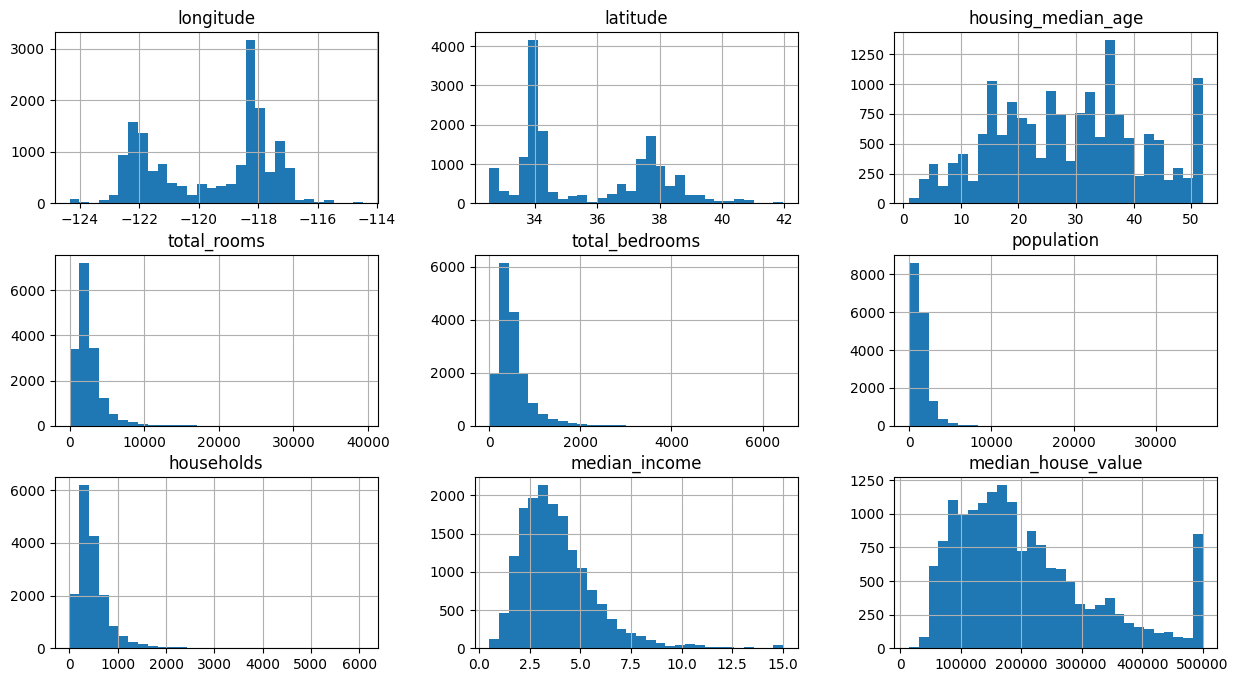

In [130]:
train_data.hist(figsize=(15, 8), bins=30)
plt.show()

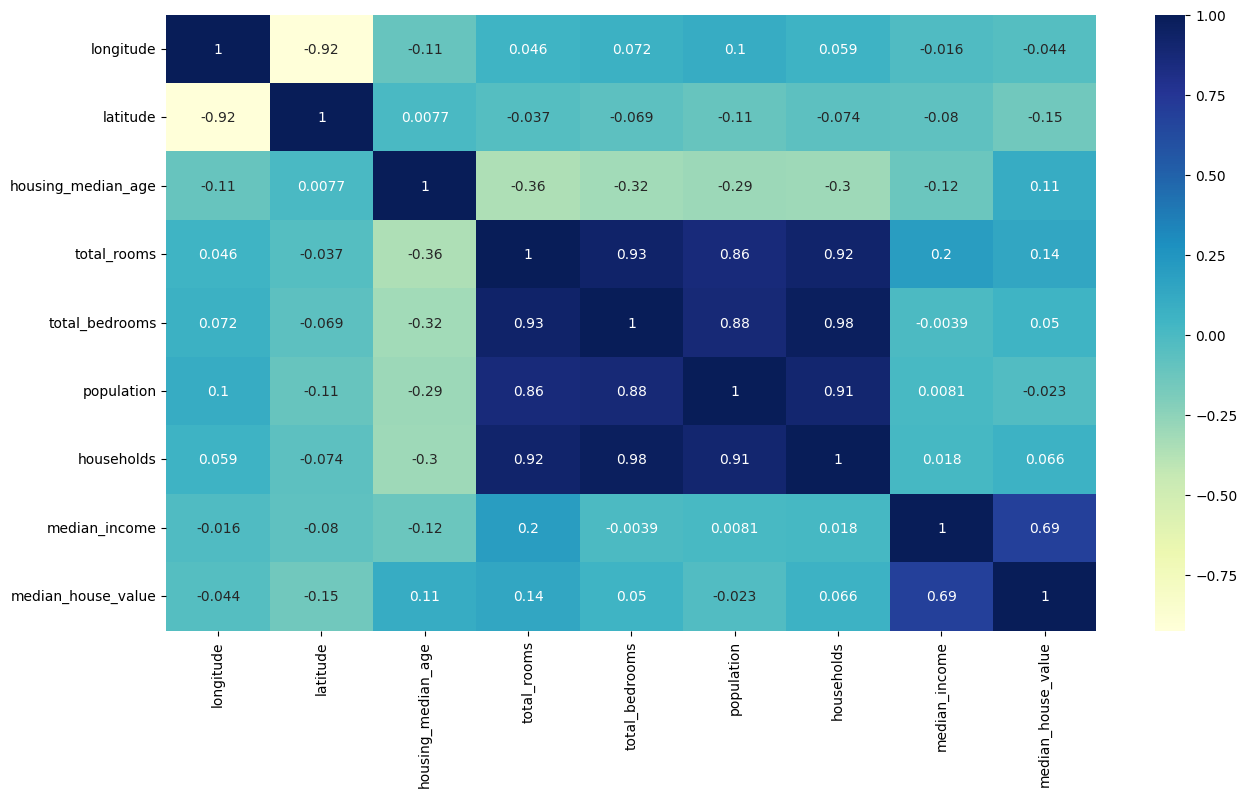

In [131]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(columns=["ocean_proximity"]).corr(), annot=True, cmap='YlGnBu')
plt.show()

## Making Skewed Plots Normally Distributed

In [132]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

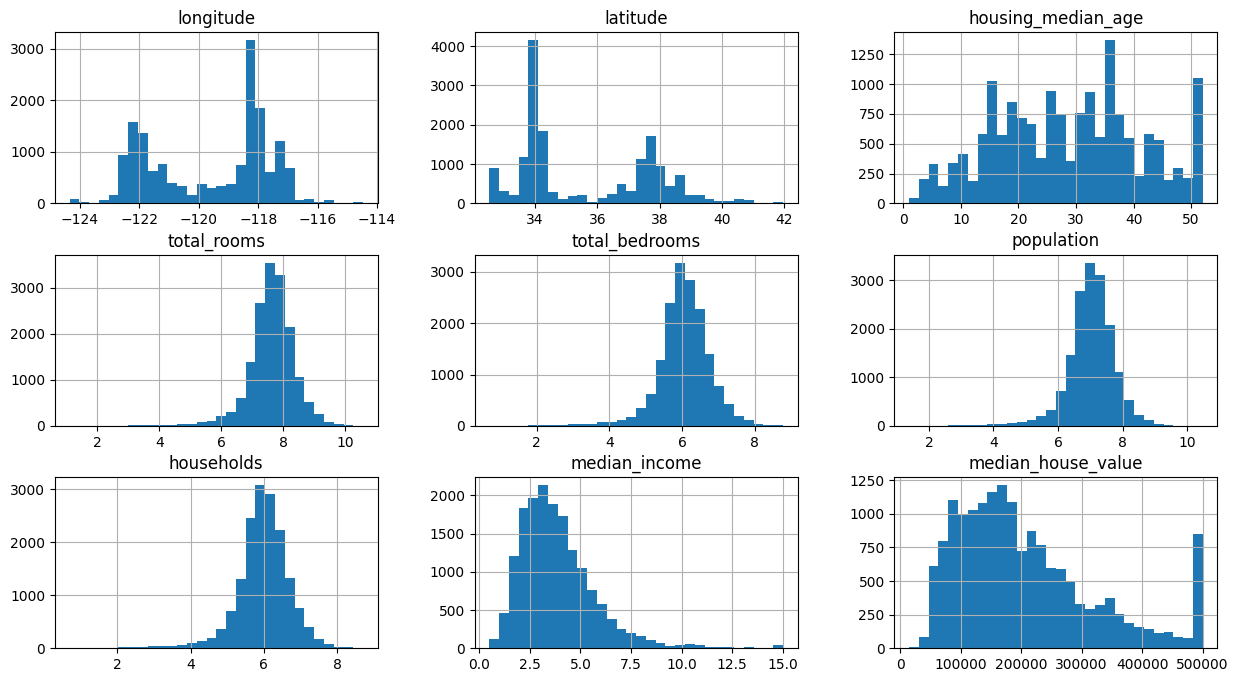

In [133]:
train_data.hist(figsize=(15, 8), bins=30)
plt.show()

## Encoding Categorical Features

In [134]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

In [135]:
train_data['income_cat'] = pd.cut(
    train_data['median_income'],
    bins=[-np.inf, 1.5, 3.0, 4.5, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
)
train_data = train_data.join(pd.get_dummies(train_data['income_cat'], prefix='income', drop_first=True))
train_data = train_data.drop(columns=['income_cat'])

## Selecting Numerical Features

In [148]:
numeric_candidates = [
    'median_income', 'housing_median_age',
    'total_rooms', 'total_bedrooms',
    'population', 'households'
]

selected_numeric = [c for c in numeric_candidates if c in train_data.columns]
print("Numeric features selected (>=5 expected):")
print(selected_numeric)

Numeric features selected (>=5 expected):
['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']


## Visualization

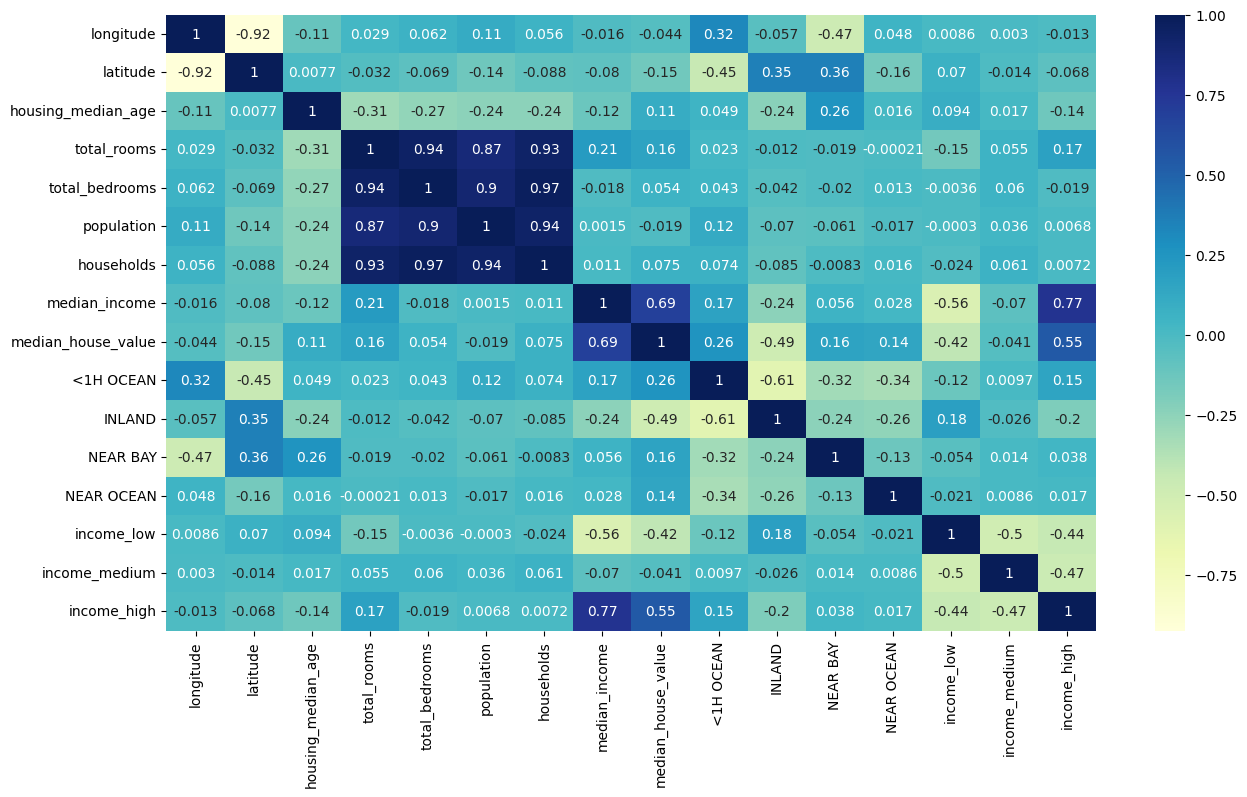

In [136]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

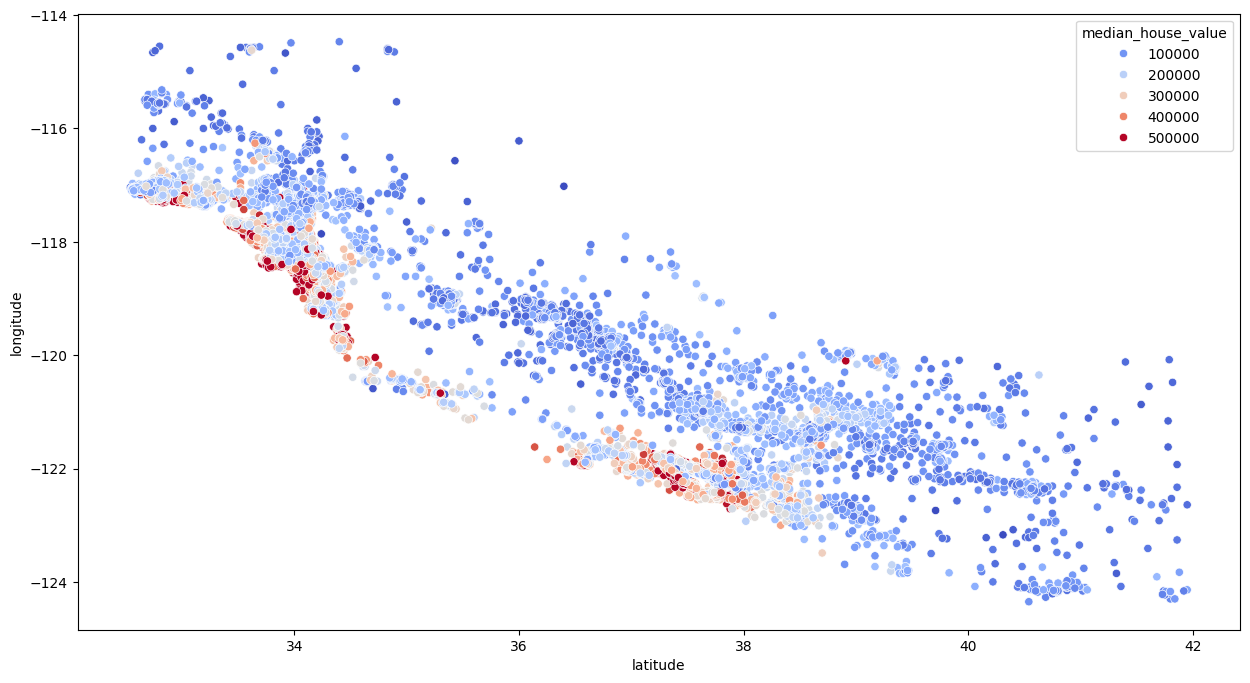

In [137]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')
plt.show()

## Feature Engineering

In [138]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

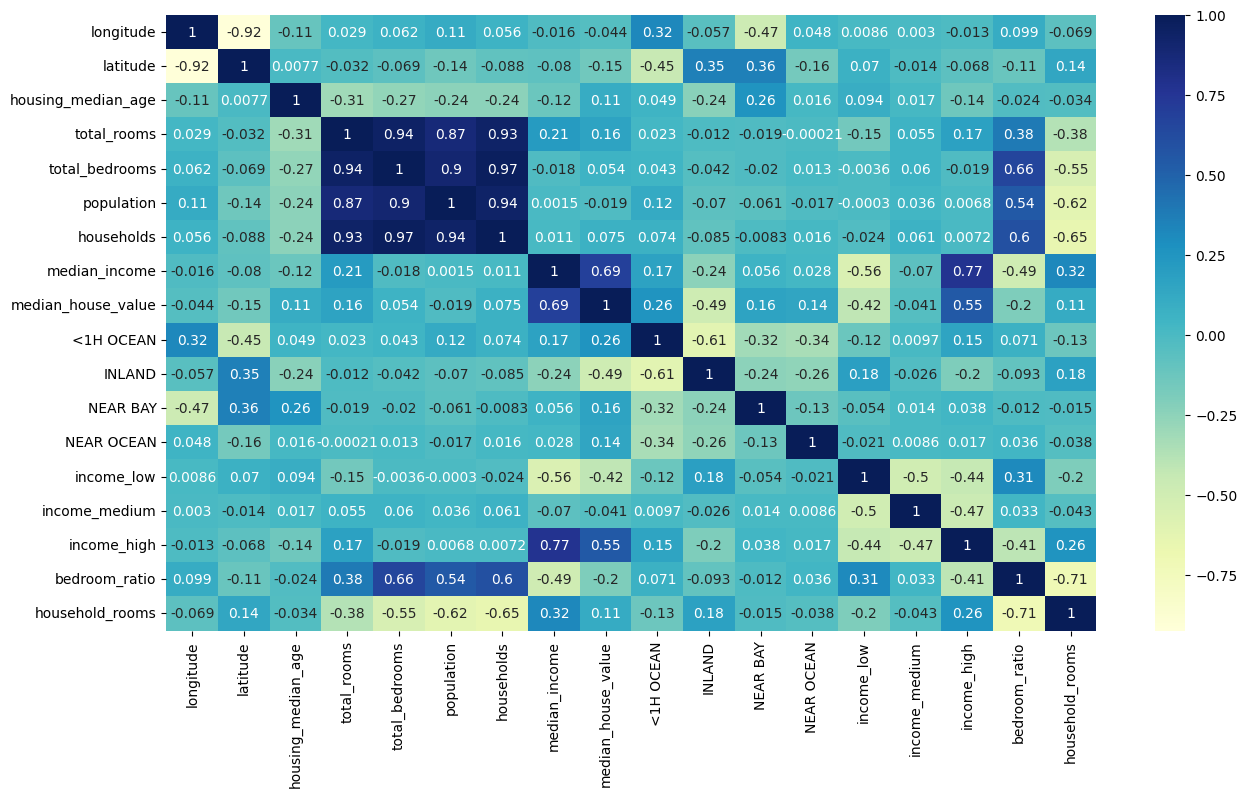

In [139]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Model Selection, Scaling and Training

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [141]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

In [142]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

In [143]:
test_data['income_cat'] = pd.cut(
    test_data['median_income'],
    bins=[-np.inf, 1.5, 3.0, 4.5, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
)
test_data = test_data.join(pd.get_dummies(test_data['income_cat'], prefix='income', drop_first=True))
test_data = test_data.drop(columns=['income_cat'])

In [144]:
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [145]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [146]:
x_test_s = scaler.transform(x_test)

## Evaluating Performance Metrics

In [150]:
from sklearn.metrics import mean_absolute_error

print("R² Score:", reg.score(x_test_s, y_test))

y_pred = reg.predict(x_test_s)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

R² Score: 0.6678550453430622
Mean Absolute Error (MAE): 48070.428832005906


## Plotting Predicted vs Actual SalePrice

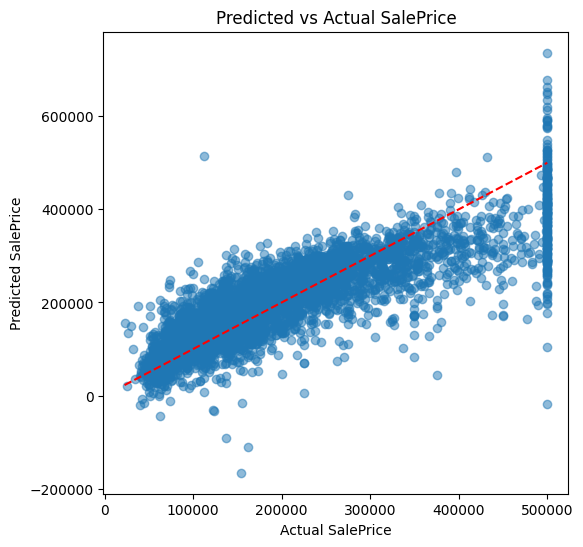

In [152]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice")
plt.show()

## Feature Importance Plot

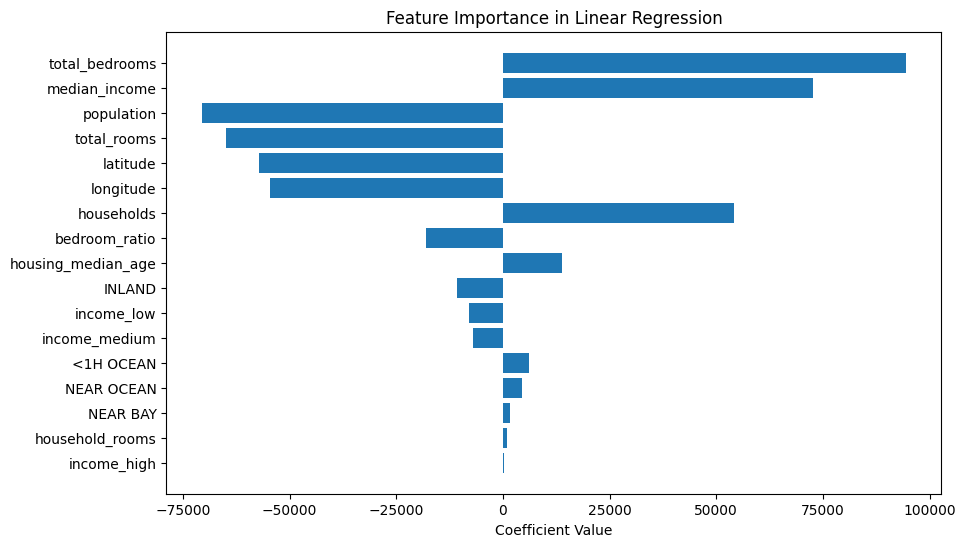

In [158]:
# Get feature names after preprocessing
feature_names = x_test.columns

# Get model coefficients
coefficients = reg.coef_

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient values
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.gca().invert_yaxis()
plt.show()

## My Reflection

- **Data Preprocessing:** Learned to handle numerical and categorical features, including scaling, log transformations, one-hot encoding, and creating new features like `bedroom_ratio` and `household_rooms`.  
- **Feature Engineering:** Derived meaningful ratios to capture room distribution and space per household, which improved the model’s understanding.  
- **Modeling:** Trained a Linear Regression model and evaluated it using R² Score and Mean Absolute Error (MAE).  
- **Visualization:** Plotted predicted vs actual values to assess model performance and visualized feature importance to see which factors most affect house prices.  
- **Key Insights:** Contrary to expectations, `total_bedrooms` showed the highest importance in this model—indicating houses with more bedrooms are valued higher followed by `median_income`. Location (ocean_proximity) also influences price.
- **Reflection:** This task reinforced the importance of preprocessing and feature engineering, showed how simple linear models can provide interpretable insights, and highlighted how understanding the data can guide better predictions.